In [1]:
import numpy as np
import json
import matplotlib.pyplot as plt

In [2]:
# Constants
agent_name = "swq13"
model_name = "test"

In [3]:
trained_model = np.load(f"model_{agent_name}_{model_name}.pt", allow_pickle = True)
policy        = np.argmax(trained_model, axis = 1)

### Evaluating the Trained model

In [4]:
print("State  Policy  Trained model")
for i in range(len(policy)):
    print(f"{i:2}", ' '*3, policy[i], ' '*5, np.round(trained_model[i], 3))


State  Policy  Trained model
 0     0       [0. 0. 0. 0.]
 1     0       [0. 0. 0. 0.]
 2     0       [0. 0. 0. 0.]
 3     0       [0. 0. 0. 0.]
 4     0       [0. 0. 0. 0.]
 5     0       [0. 0. 0. 0.]
 6     3       [-0.307 -0.398  0.04   0.564]
 7     3       [-0.058  0.415  0.078  0.448]
 8     2       [0.054 0.128 0.449 0.267]
 9     0       [0. 0. 0. 0.]
10     0       [0. 0. 0. 0.]
11     0       [0. 0. 0. 0.]
12     0       [0. 0. 0. 0.]
13     0       [0. 0. 0. 0.]
14     0       [0. 0. 0. 0.]


### Looking at the training process

In [18]:
def moving_average(x, w):
    """
    from https://newbedev.com/how-to-calculate-rolling-moving-average-using-numpy-scipy
    """
    return np.convolve(x, np.ones(w), 'valid') / w

In [8]:
with open("results_train.json") as file:
    training_results = json.load(file)

In [9]:
number_of_rounds = training_results['by_agent'][f"agent_{agent_name}"]['rounds']
rounds           = np.arange(number_of_rounds) + 1

round_list      = list(training_results['by_round'])
collected_coins = np.zeros(number_of_rounds)
round_lengths   = np.zeros(number_of_rounds)
for i, round_name in enumerate(round_list):
    round              = training_results['by_round'][round_name]
    collected_coins[i] = round['coins']
    round_lengths[i]   = round['steps']

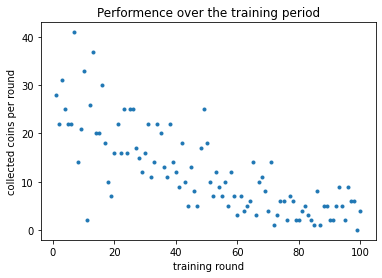

In [10]:
plt.plot(rounds, collected_coins, '.')
plt.title("Performence over the training period")
plt.ylabel("collected coins per round")
plt.xlabel("training round")
plt.show()

In [11]:
allQs = np.load("Qtrain.npy")

In [12]:
def analyze_state (state):
    Q_state = allQs[:, state]
    labels  = ["action 0", "action 1", "action 2", "action 3"]

    plt.plot(rounds, Q_state, label = labels)
    plt.title(f"Evolution of state {state}")
    plt.ylabel("Q-value")
    plt.xlabel("training round")
    plt.legend()

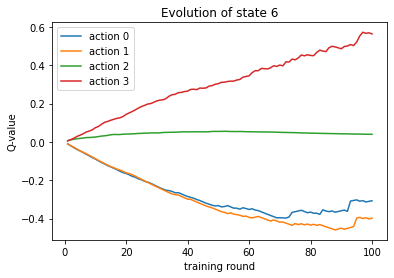

In [13]:
analyze_state(6)

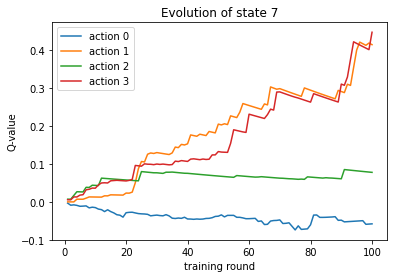

In [14]:
analyze_state(7)

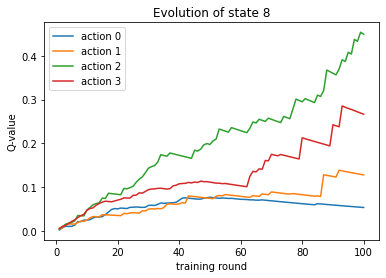

In [15]:
analyze_state(8)